### Data Exploration of Concrete Cracks Image Dataset
URL: https://www.kaggle.com/datasets/aniruddhsharma/structural-defects-network-concrete-crack-images

In [6]:
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import common as cmn

In [7]:
def getCategorizedCounts(folderInfo):
    counts = []
    for imf in folderInfo: 
        counts.append([cmn.get_category(imf[0]),cmn.get_class(imf[0]),imf[1]])
    return counts

def printPercentage(part, total):
    p = 100 * float(part)/float(total)
    return str(round(p,3)) + "%"

def summarizeByClass(catList):
        sumsByClasses = {}
        for e in catList:
            if e[1] in sumsByClasses.keys():
                sumsByClasses[e[1]] += e[2]
            else:
                sumsByClasses[e[1]] = e[2]
        return sumsByClasses
    
def printClassSummary(sumDict):
    print(sumDict)
    total = sum(sumDict.values())
    print(f"Total number: {total}")        
    
    for key, value in sorted(sumDict.items()):
        print(
            f"Number of {key}: {value} ({printPercentage(value, total)})")
    print("")
    
def printSummary(catLabel, catDict):  
    print(f"{catLabel}:")
    printClassSummary(catDict)

In [10]:
folderInfo = cmn.get_folder_info("../Data/Raw")
picCounts = getCategorizedCounts(folderInfo)

In [11]:
summaries = {}
summaries["All images"] = summarizeByClass(picCounts)

for cat in list(set([dc[0] for dc in picCounts])):
    catFilteredCounts = list(filter(lambda d: d[0] == cat, picCounts))
    summaries[cat] = summarizeByClass(catFilteredCounts)
    
for k, v in sorted(summaries.items()):
    printSummary(k, v)

All images:
{'Cracked': 8484, 'Non-cracked': 47608}
Total number: 56092
Number of Cracked: 8484 (15.125%)
Number of Non-cracked: 47608 (84.875%)

Decks:
{'Cracked': 2025, 'Non-cracked': 11595}
Total number: 13620
Number of Cracked: 2025 (14.868%)
Number of Non-cracked: 11595 (85.132%)

Pavements:
{'Cracked': 2608, 'Non-cracked': 21726}
Total number: 24334
Number of Cracked: 2608 (10.718%)
Number of Non-cracked: 21726 (89.282%)

Walls:
{'Cracked': 3851, 'Non-cracked': 14287}
Total number: 18138
Number of Cracked: 3851 (21.232%)
Number of Non-cracked: 14287 (78.768%)



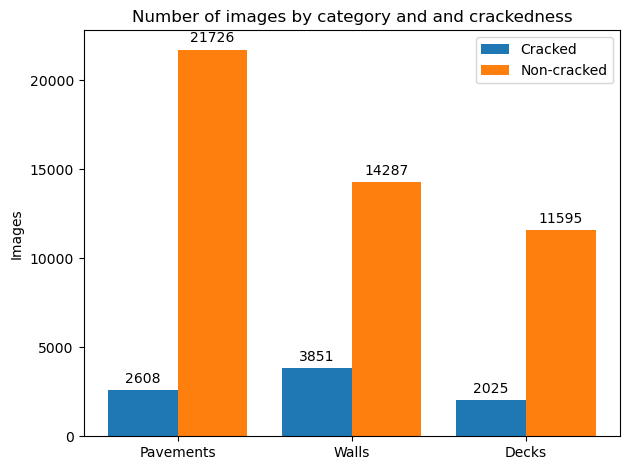

In [12]:
classCountsByCategory = {}
ctgLabels = []

for ctg, ctgSummary in summaries.items():
    if ctg != "All images":
        ctgLabels.append(ctg)
                
        for cls, clsCount in ctgSummary.items():
            if cls in classCountsByCategory.keys():
                classCountsByCategory[cls].append(clsCount)
            else:
                classCountsByCategory[cls] = [clsCount]
           
x = np.arange(len(ctgLabels))
fillRatio = 0.8
xWidth = fillRatio/(len(classCountsByCategory))
xShift = - (len(classCountsByCategory)-1) * xWidth/2

fig, ax = plt.subplots()
rects =[]

for i, (k, v) in enumerate(classCountsByCategory.items()):
    iShift = xShift + i * xWidth
    rects.append(ax.bar(x + iShift, v, xWidth, label=k))
    
ax.set_ylabel('Images')
ax.set_title('Number of images by category and and crackedness')
ax.set_xticks(x)
ax.set_xticklabels(ctgLabels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

for r in rects:
    autolabel(r)

fig.tight_layout()
plt.show()

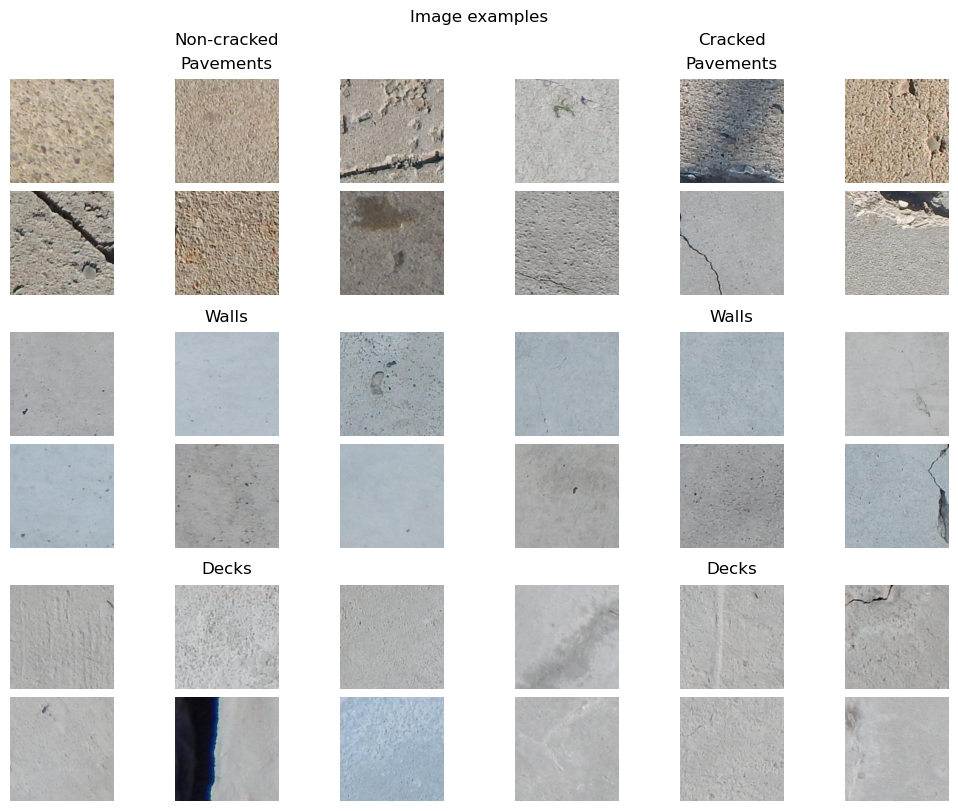

In [13]:
imgRows = 2
imgCols = 3

picCategories = list(set([dc[0] for dc in picCounts]))
picClasses = list(set([dc[1] for dc in picCounts]))

fig = plt.figure(constrained_layout=True, figsize=(10, 8))
fig.suptitle('Image examples')

allNestedSubfigs = []
subfigs = fig.subfigures(1, len(picClasses))

for sf in subfigs:
    sf.suptitle(picClasses[list(subfigs).index(sf)])
    nestedSubfigs = sf.subfigures(len(picCategories), 1)
    for nsf in nestedSubfigs:
        nsf.suptitle(picCategories[list(nestedSubfigs).index(nsf)])
        allNestedSubfigs.append(nsf)
        
nsfMatrix = np.array(allNestedSubfigs).reshape((len(picClasses),len(picCategories))).transpose()

for imf in folderInfo:
    rand_images = random.choices(imf[2], k=imgRows * imgCols)

    rowIndex = picCategories.index(cmn.get_category(imf[0]))
    colIndex = picClasses.index(cmn.get_class(imf[0]))
    
    subfig = nsfMatrix[rowIndex,colIndex]
    axs = subfig.subplots(imgRows, imgCols)
          
    for ax, img in zip(axs.flat, rand_images):
            image = plt.imread(os.path.join(imf[0], img))
            ax.axis('off')
            ax.imshow(image)

plt.show()